<a href="https://colab.research.google.com/github/MuhammadTanveerm/End-to-End-Customer-Churn-Prediction-System-industry-level-/blob/main/End_to_end_Churn_prediction_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# **Customer Churn Prediction (Bussiness Goal)**

Customers leave the platform silently → revenue loss → high acquisition cost.





**Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


%matplotlib inline


**Load Dataset**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Job ready ML projects 2026/ Customer Churn Prediction System/customer_churn_dataset-testing-master.csv")

In [ ]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [48]:
#groupby
ans = df.groupby(["Gender"]).agg(
    total_salary=('Total Spend', 'sum'),
)
print(ans)

        total_salary
Gender              
0           18340004
1           16487835


        total_salary
Gender              
0           18340004
1           16487835


# **Exploratory Data Analysis  (EDA)**

**Basic Info**

In [ ]:
print( f"Shape of dataset: " )
print(df.shape)

print(f"Information about dataset: ")
print(df.info())

print(f"Statistic of dataset features: ")
print(df.describe())

Shape of dataset: 
(64374, 12)
Information about dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB
None
Statistic of dataset features: 
         CustomerID           Age        Tenure  Usage Frequency  \
count  64374.000000

In [ ]:
#Dataset Columns
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

**Churn Analysis**

In [ ]:
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
0,0.526315
1,0.473685


## **Features Classification**

In [ ]:
numerical_col = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_col)
print(len(numerical_col))

categorical_col = df.select_dtypes(include=['category', 'object']).columns
print(categorical_col)
print(len(categorical_col))



Index(['CustomerID', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')
9
Index(['Gender', 'Subscription Type', 'Contract Length'], dtype='object')
3


## **Univariate Analysis**

**Numeric Features Analysis**

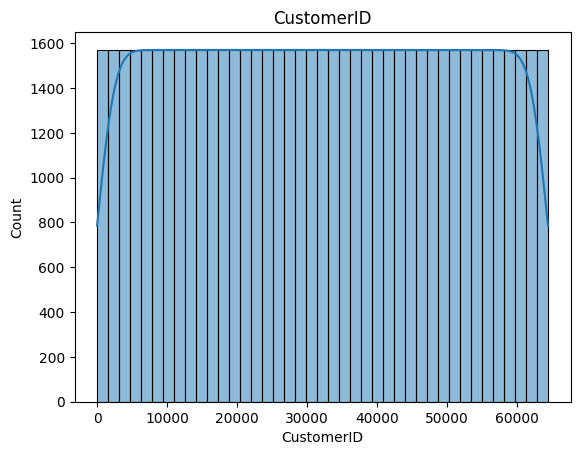

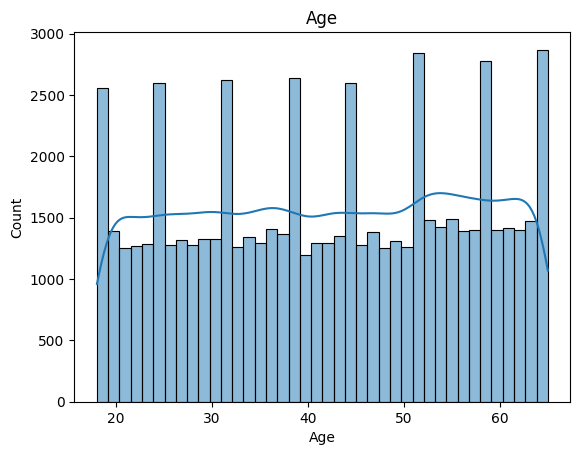

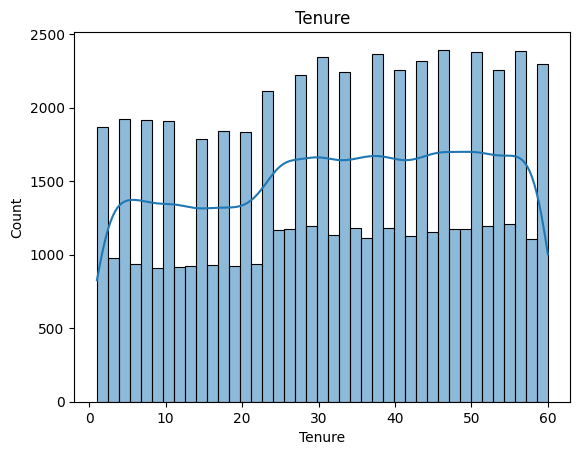

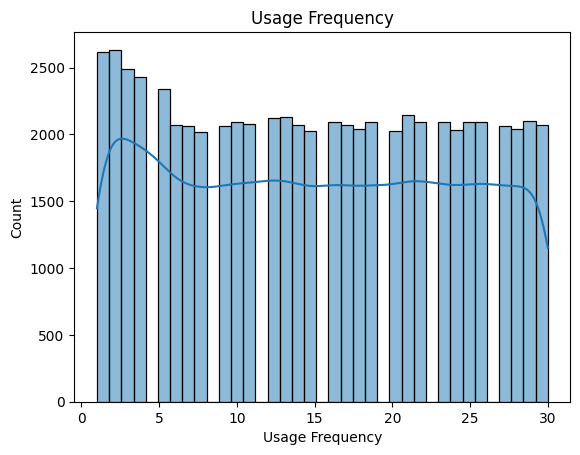

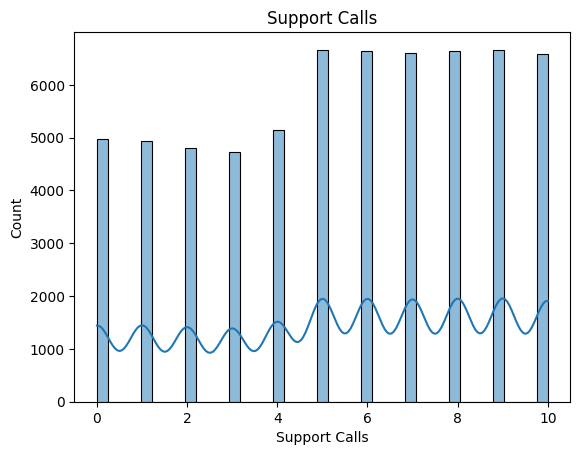

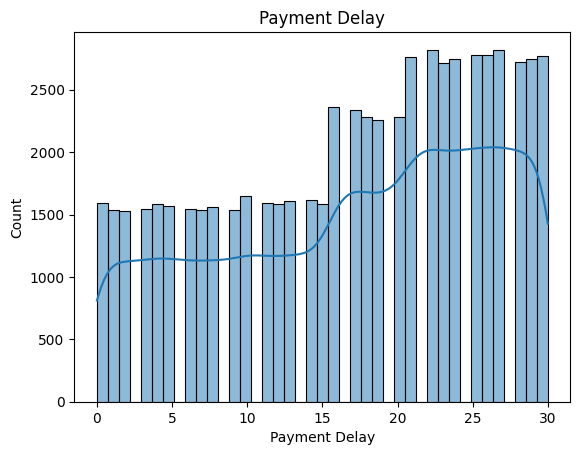

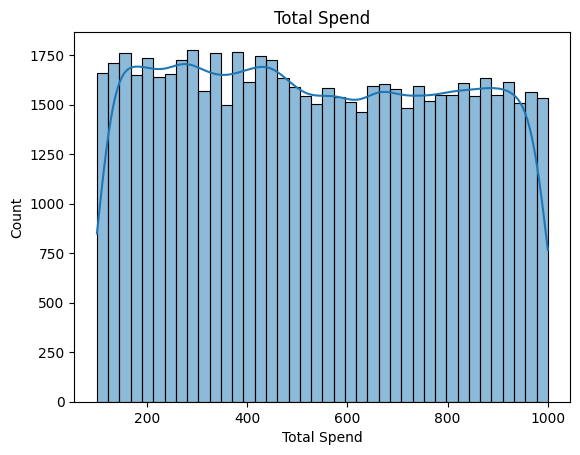

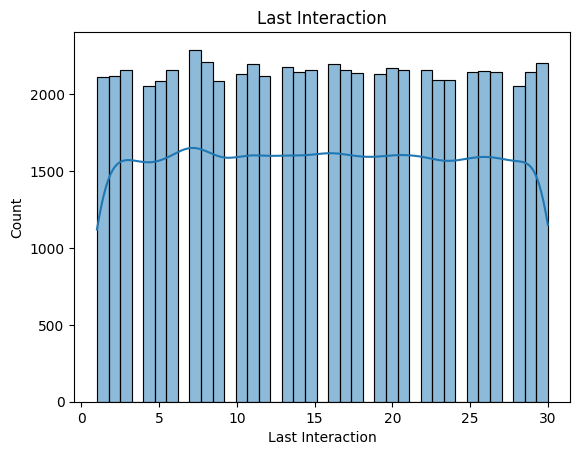

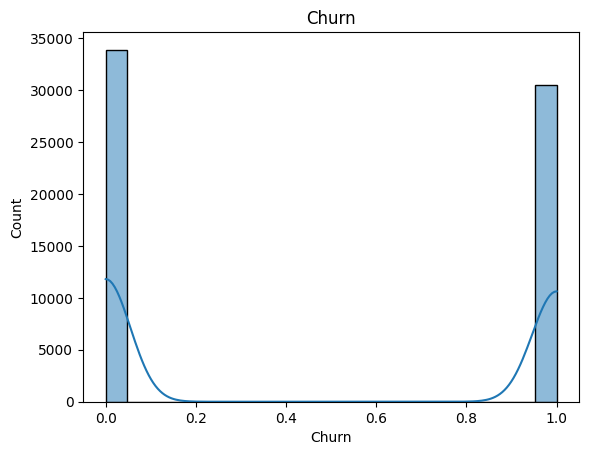

In [ ]:
for col in numerical_col:

  sns.histplot(df[col], kde=True)

  plt.title(col)
  plt.show()

**Categorical Features Analysis**

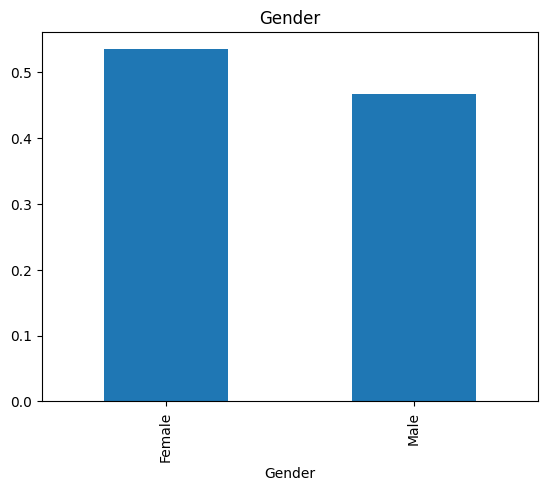

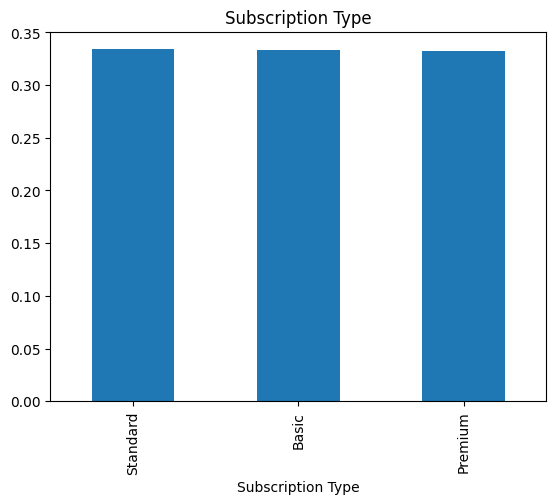

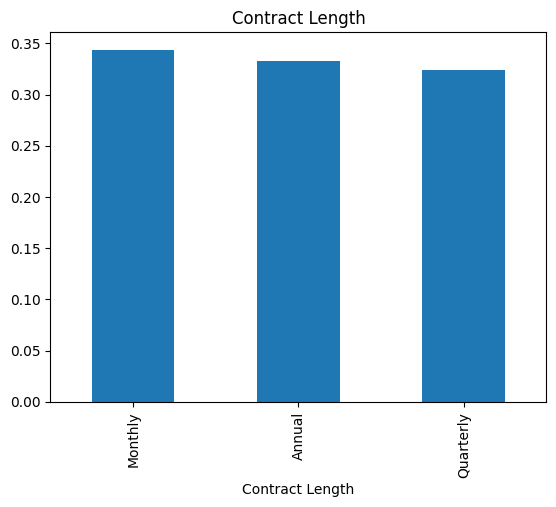

In [ ]:
for col in categorical_col:
  df[col].value_counts(normalize=True).plot(kind='bar')
  plt.title(col)
  plt.show()

****

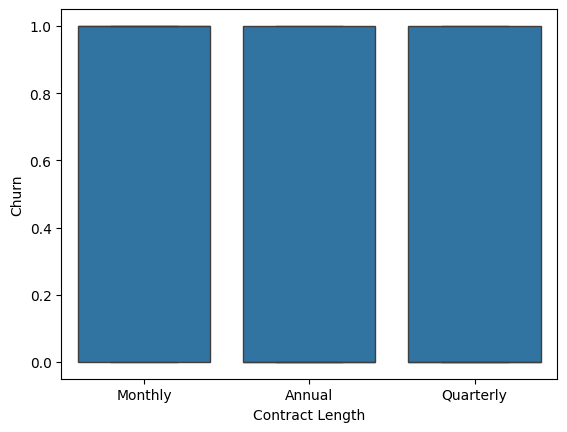

In [ ]:
sns.boxplot(x="Contract Length", y="Churn", data=df)

plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


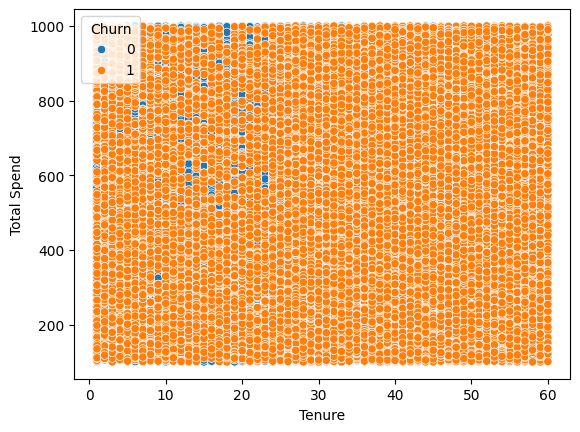

In [ ]:
sns.scatterplot(x='Tenure',y='Total Spend', hue='Churn', data=df)
plt.show()

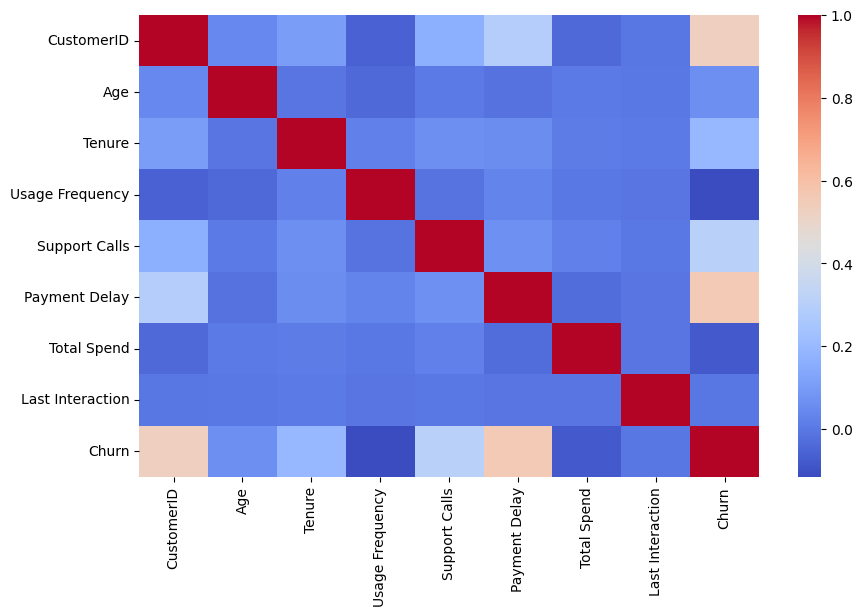

In [ ]:
#Multivariate Analysis
#correlation Matrix
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_col].corr(), annot=False, cmap='coolwarm')
plt.show()

# **Preprocessing**

**Label encoding (categorical Columns)**

In [ ]:
#Label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder= {}
le = LabelEncoder()
for col in categorical_col:
  df[col] = le.fit_transform(df[col])



**Numerical Colunms (Scalling)**

In [ ]:
# from  sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# for col in numerical_col:
#   df[col] = sc.fit_transform(df[[col]])

In [ ]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,0,25,14,4,27,0,1,598,9,1
1,2,41,0,28,28,7,13,2,1,584,20,0
2,3,47,1,27,10,2,29,1,0,757,21,0
3,4,35,1,9,12,5,17,1,2,232,18,0
4,5,53,0,58,24,9,2,2,0,533,18,0


**Split Dataset**
  

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X= df.drop(columns=['CustomerID', 'Churn'])
y=df['Churn']
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.3)

In [ ]:
y

,Churn
0,1
1,0
2,0
3,0
4,0
...,...
64369,1
64370,1
64371,1
64372,1


# **Apply Models**

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

model= LogisticRegression(max_iter=1000, class_weight='balanced',  penalty='l2',)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

**Prediction**

In [ ]:
y_pred =model.predict(X_test)


# **Evalution Merices**

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression: {accuracy}")
print(f"Confustion Metric:")
confusion_Matric =confusion_matrix(y_test, y_pred)
print(confusion_Matric)
recallScore = recall_score(y_test, y_pred)
print(f"Recall Score: ")
print(recallScore)

Accuracy of Logistic Regression: 0.8272666079842593
Confustion Metric:
[[8256 1878]
 [1458 7721]]
Recall Score: 
0.8411591676653231


# **RandomForest**

**Hyperparameter Tuning**

In [ ]:
#  from sklearn.ensemble import RandomForestClassifier
#  from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report
# model = RandomForestClassifier()
# param_grid={
#     'n_estimators' : [100, 200, 300],
#     'max_depth' : [6, 8, 10],
#     'criterion': ["gini", "entropy"],
# }
# grid_search=GridSearchCV(model,param_grid, cv=5, scoring='accuracy' )
# grid_search.fit(X_train, y_train)

In [ ]:
# print(grid_search.best_params_)
# print(grid_search.best_score_)

In [ ]:
 from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    class_weight='balanced',
    oob_score=True,
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=300, n_jobs=-1,
                       oob_score=True, random_state=42)

In [ ]:
rfc_pred_y = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, rfc_pred_y)
print(f"RandomForestClassificer Accuracy: {accuracy}")

RandomForestClassificer Accuracy: 0.9973075130740952


# **Prediction with New Data**

# Task
Define a new customer's features with original categorical values, apply label encoding using mappings derived from the initial dataset, and then predict the churn status for this customer using the trained `rf` model. Display the new customer's data and the predicted churn outcome.

## Define new data

### Subtask:
Create a Pandas DataFrame for a new customer with features similar to the training data, using original categorical string values.


**Reasoning**:
Creating a dictionary with example data for a new customer, including original categorical string values, as specified in the instructions. This dictionary will then be converted into a Pandas DataFrame.



In [ ]:
new_customer_dict = {
    'Age': 30,
    'Gender': 'Female',
    'Tenure': 12,
    'Usage Frequency': 15,
    'Support Calls': 2,
    'Payment Delay': 5,
    'Subscription Type': 'Basic',
    'Contract Length': 'Monthly',
    'Total Spend': 300,
    'Last Interaction': 10
}

new_customer_data = pd.DataFrame([new_customer_dict])

print("New customer data DataFrame created:")
print(new_customer_data)

New customer data DataFrame created:
   Age  Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0   30  Female      12               15              2              5   

  Subscription Type Contract Length  Total Spend  Last Interaction  
0             Basic         Monthly          300                10  


**Reasoning**:
To apply label encoding to the new customer data, I need to re-initialize and fit `LabelEncoder` instances for each categorical column using the original `df` to ensure consistent mapping. The `label_encoder` dictionary in the kernel state was not populated with the fitted encoders during the previous preprocessing step. After fitting, I will transform the categorical columns in the `new_customer_data`.



In [ ]:
# label_encoders_map = {}
# for col in categorical_col:
#     le = LabelEncoder()
#     le.fit(df[col])
#     label_encoders_map[col] = le
#     new_customer_data[col] = le.transform(new_customer_data[col])

# print("New customer data after label encoding:")
# print(new_customer_data)


**Reasoning**:
The previous cell failed because the `LabelEncoder` was fitted on numerically encoded columns from `df`, but then attempted to transform string values from `new_customer_data`. To fix this, I will re-initialize `LabelEncoder` instances for each categorical column and fit them on the *original string categories* that were present in the dataset, ensuring consistent mapping for the new customer data. Since the original string columns of `df` are no longer available (they were encoded in-place), I will explicitly define the known string categories for each column to fit the encoders correctly.



In [ ]:
label_encoders_map = {}
for col in categorical_col:
    le = LabelEncoder()
    # Fit LabelEncoder on the known string categories for each column
    if col == 'Gender':
        le.fit(['Female', 'Male'])
    elif col == 'Subscription Type':
        le.fit(['Basic', 'Premium', 'Standard'])
    elif col == 'Contract Length':
        le.fit(['Annual', 'Monthly', 'Quarterly'])
    # Store the fitted encoder and transform the new customer data
    label_encoders_map[col] = le
    new_customer_data[col] = le.transform(new_customer_data[col])

print("New customer data after label encoding:")
print(new_customer_data)

New customer data after label encoding:
   Age  Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0   30       0      12               15              2              5   

   Subscription Type  Contract Length  Total Spend  Last Interaction  
0                  0                1          300                10  


**Reasoning**:
Now that the new customer data has been properly encoded, I will use the trained `rf` (RandomForestClassifier) model to predict the churn status for this new customer. I will then print the predicted outcome.



In [ ]:
predicted_churn = rf.predict(new_customer_data)

print(f"Predicted Churn for New Customer: {predicted_churn[0]}")
if predicted_churn[0] == 1:
    print("This customer is predicted to churn.")
else:
    print("This customer is predicted not to churn.")

Predicted Churn for New Customer: 0
This customer is predicted not to churn.


# **Model Explainability**

In [ ]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)

In [ ]:
print(shap_values)

[[[-1.38620387e-02  1.38620387e-02]
  [-1.12764401e-01  1.12764401e-01]
  [ 8.44294515e-02 -8.44294515e-02]
  ...
  [ 8.34253304e-02 -8.34253304e-02]
  [ 1.45509054e-01 -1.45509054e-01]
  [-1.78040620e-06  1.78040620e-06]]

 [[-3.20442851e-02  3.20442851e-02]
  [-2.18530015e-02  2.18530015e-02]
  [-3.03457856e-02  3.03457856e-02]
  ...
  [-1.45182934e-03  1.45182934e-03]
  [-1.64603899e-02  1.64603899e-02]
  [ 1.27487040e-04 -1.27487040e-04]]

 [[ 1.07368679e-02 -1.07368679e-02]
  [ 2.16015613e-01 -2.16015613e-01]
  [-4.42016961e-02  4.42016961e-02]
  ...
  [-2.35177530e-02  2.35177530e-02]
  [ 2.96972783e-02 -2.96972783e-02]
  [ 3.68879114e-04 -3.68879114e-04]]

 ...

 [[ 7.72934456e-03 -7.72934456e-03]
  [-1.56595460e-01  1.56595460e-01]
  [-2.70542263e-02  2.70542263e-02]
  ...
  [ 1.74868505e-02 -1.74868505e-02]
  [-9.27409199e-02  9.27409199e-02]
  [-8.48370898e-04  8.48370898e-04]]

 [[ 2.59734660e-02 -2.59734660e-02]
  [ 2.86021249e-02 -2.86021249e-02]
  [-4.56965774e-02  4.5696

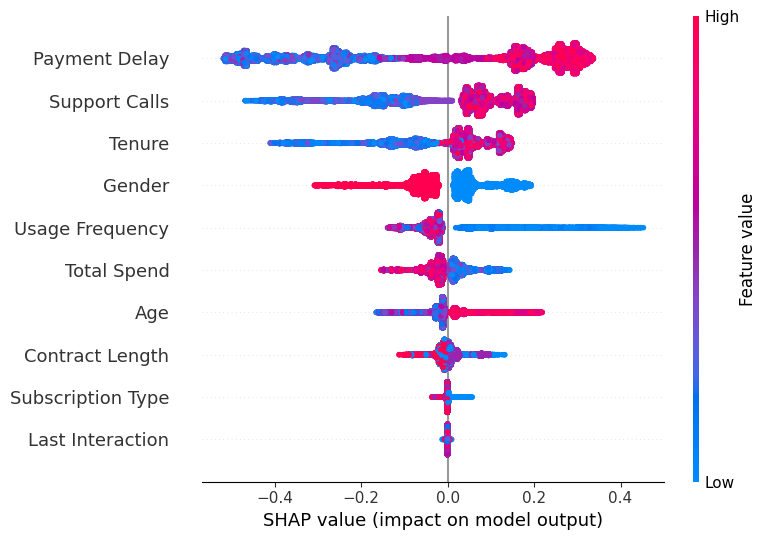

In [ ]:
shap.summary_plot(shap_values[:, :, 1], X_train.values, feature_names=X_train.columns)